<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch03/03_karaage_ai_book_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テキスト分析

テキスト分析のノートブックです。

## データの前処理
AIに学習させるための下準備として、学習させるデータに対して、以下の処理を順に実施します。

1. 教師データのダウンロード
1. 教師データのテキストを分かち書きする
1. 不要なデータを削除する

ただ、3の不要なデータの削除は、現段階では分からないので一旦データを可視化してから再度実施することにします。

### 教師データのダウンロード

青空文庫のテキストデータをGitHubからダウンロードします。

In [1]:
!wget https://github.com/aozorabunko/aozorabunko/raw/master/cards/000096/files/2093_ruby_28087.zip
!unzip 2093_ruby_28087.zip

--2023-09-23 13:34:30--  https://github.com/aozorabunko/aozorabunko/raw/master/cards/000096/files/2093_ruby_28087.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aozorabunko/aozorabunko/master/cards/000096/files/2093_ruby_28087.zip [following]
--2023-09-23 13:34:30--  https://raw.githubusercontent.com/aozorabunko/aozorabunko/master/cards/000096/files/2093_ruby_28087.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 421747 (412K) [application/zip]
Saving to: ‘2093_ruby_28087.zip’

2093_ruby_28087.zip 100%[===================>] 411.86K  --.-KB/s    in 0.009s  

2023-09-23 13:34:30 (44.4 MB/s

文字コードを nkf で調べます。最初にnkfをインストールします。

In [2]:
!apt install nkf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  nkf
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 154 kB of archives.
After this operation, 367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 nkf amd64 1:2.1.5-1build3 [154 kB]
Fetched 154 kB in 0s (330 kB/s)
Selecting previously unselected package nkf.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack .../nkf_1%3a2.1.5-1build3_amd64.deb ...
Unpacking nkf (1:2.1.5-1build3) ...
Setting up nkf (1:2.1.5-1build3) ...
Processing triggers for man-db (2.10.2-1) ...


文字コードを調べます。

In [3]:
!nkf --guess dogura_magura.txt

Shift_JIS (CRLF)


文字コードに対応して、ファイルを読み込みます。

In [4]:
text_list = []
with open('dogura_magura.txt', encoding='shift_jis') as f:
  text_list = f.readlines()

読み込めたか、冒頭のテキストを確認します。

In [5]:
text_list[0:10]

['ドグラ・マグラ\n',
 '夢野久作\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）蜜蜂《みつばち》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n']

### データの前処理


形態素解析ライブラリの「janome」をインストール

In [6]:
!pip install janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 72.0 MB/s eta 0:00:00


サンプルの文章を形態素解析して、分かち書き

In [7]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
tokens = t.tokenize("私はからあげが好きです")

words = []
for token in tokens:
  print(token)
  words.append(token.surface)

text = ' '.join(words)
print(text)

私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
から	助詞,格助詞,一般,*,*,*,から,カラ,カラ
あげ	動詞,自立,*,*,一段,連用形,あげる,アゲ,アゲ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
好き	名詞,形容動詞語幹,*,*,*,*,好き,スキ,スキ
です	助動詞,*,*,*,特殊・デス,基本形,です,デス,デス
私 は から あげ が 好き です


In [9]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in text_list:
  tokens = t.tokenize(text)
  for token in tokens:
    pos = token.part_of_speech.split(',')[0]
    if pos == '名詞':
      words.append(token.surface)

text = ' '.join(words)

中身を確認

In [10]:
print(text[500:600])

 余韻 そこ ら 中 ヒッソリ 私 眼 白 ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 よう 凝然 真下 人造 石 床


In [11]:
filename='wakachi_text.txt'
with open(filename, 'w', encoding='utf-8') as f:
    f.write(text)
print("file is saved")

file is saved


In [12]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## WordCloudで可視化

In [13]:
!apt -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (38.9 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

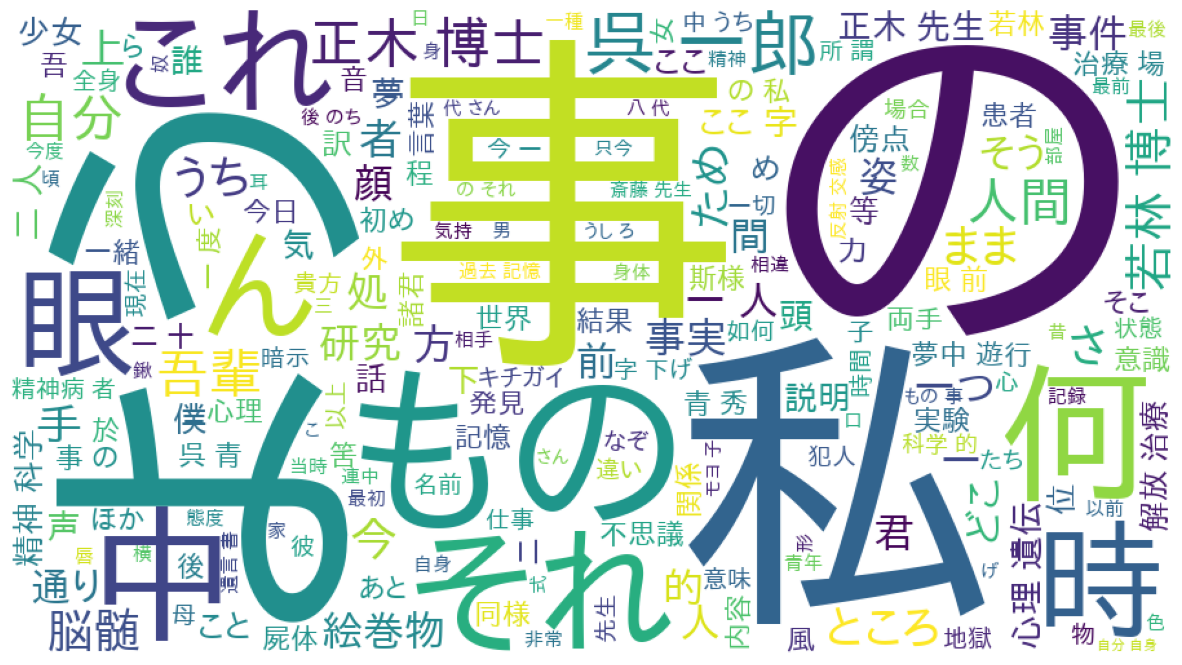

In [15]:
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## データの前処理追加

In [16]:
import re
re.sub(r'からあげ','', '私はからあげです')

'私はです'

再度テキストを読み込みます

In [17]:
text_list = []
with open('dogura_magura.txt', encoding='shift_jis') as f:
  text_list = f.readlines()

不要な文字を削除する関数を定義します。

In [18]:
import re
def normalize_text(text):
  text = re.sub(r'それ', "", text)
  text = re.sub(r'よう', "", text)
  text = re.sub(r'もの', "", text)
  text = re.sub(r'これ', "", text)
  text = re.sub(r'うち', "", text)
  text = re.sub(r'ここ', "", text)
  text = re.sub(r'こと', "", text)
  text = re.sub(r'もの', "", text)
  text = re.sub(r'そう', "", text)
  text = re.sub(r'\n', "", text)
  text = text.strip()
  return text

In [19]:
new_text_list = []
for text in text_list:
  text = normalize_text(text)
  new_text_list.append(text)

In [20]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = []
for text in new_text_list:
  tokens = t.tokenize(text)
  for token in tokens:
    pos = token.part_of_speech.split(',')[0]
    if pos == '名詞':
      words.append(token.surface)

text = ' '.join(words)

In [21]:
text[500:600]

'ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 凝然 真下 人造 石 床 上 私 大の字 型 なり 私 大の字 型 なり '

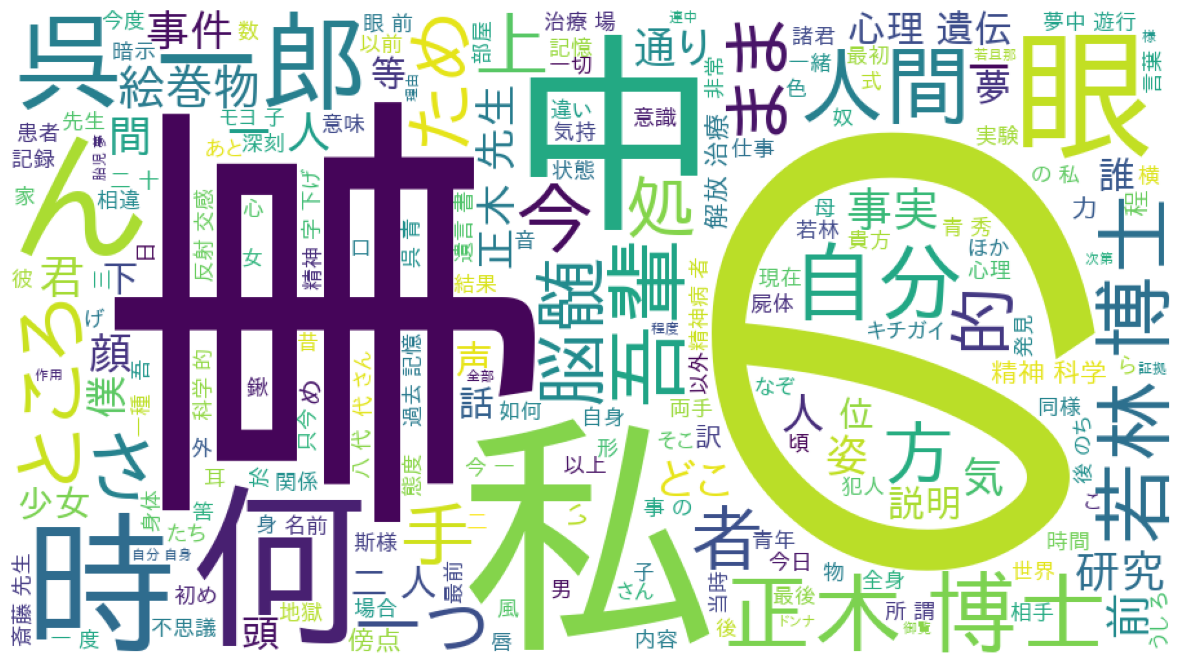

In [22]:
fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Word2Vecで可視化

最初に分かち書きした文章を、テキストファイルに保存します。

In [23]:
filename='wakachi_text.txt'
with open(filename, 'w', encoding='utf-8') as f:
  f.write(text)
print("file is saved")

file is saved


In [24]:
print(text[0:500])

ドグラ・マグラ 夢野 久作 ------------------------------------------------------- テキスト 中 記号 ルビ 例 蜜蜂 みつば ルビ 文字 列 始まり 特定 記号 例 大の字 型 なり ＃］： 入力 者 注 主 外字 説明 傍点 位置 指定 数字 JIS X 0213 面 区点 番号 Unicode 底本 ページ 行 数 例 ）※［＃ ローマ 数字 1 1 - 13 - 21 ＃…］： 点 例 五 月 於 ［＃ 二 二 倍 踊り字 縦 形 繰り返し 記号 例 やう 語り 出 づるやう 濁点 付き 二 倍 踊り字 ／″＼」 ------------------------------------------------------- ＃ ページ 左右 中央 ＃ ５ 字 下げ 巻頭 歌 胎児 胎児 母親 心 の ＃ 字 ＃ 改 ページ ブウウ ンンン ンンンン 私 ウスウス 眼 時 蜜蜂 みつば 音 弾力 余韻 私 耳 穴 中 ジッ 今 真夜中 直覚 どこ 近く ボンボン 時計 ん 蜜蜂 の 余韻 そこ ら 中 ヒッソリ 私 眼 白 


In [25]:
!cat wakachi_text.txt

ドグラ・マグラ 夢野 久作 ------------------------------------------------------- テキスト 中 記号 ルビ 例 蜜蜂 みつば ルビ 文字 列 始まり 特定 記号 例 大の字 型 なり ＃］： 入力 者 注 主 外字 説明 傍点 位置 指定 数字 JIS X 0213 面 区点 番号 Unicode 底本 ページ 行 数 例 ）※［＃ ローマ 数字 1 1 - 13 - 21 ＃…］： 点 例 五 月 於 ［＃ 二 二 倍 踊り字 縦 形 繰り返し 記号 例 やう 語り 出 づるやう 濁点 付き 二 倍 踊り字 ／″＼」 ------------------------------------------------------- ＃ ページ 左右 中央 ＃ ５ 字 下げ 巻頭 歌 胎児 胎児 母親 心 の ＃ 字 ＃ 改 ページ ブウウ ンンン ンンンン 私 ウスウス 眼 時 蜜蜂 みつば 音 弾力 余韻 私 耳 穴 中 ジッ 今 真夜中 直覚 どこ 近く ボンボン 時計 ん 蜜蜂 の 余韻 そこ ら 中 ヒッソリ 私 眼 白 ペンキ 塗 天井 裏 薄 塵埃 ほこり 蔽 裸 電球 タッタ 一つ ブラ 赤 硝子 球 ガラス だま 横腹 蠅 はえ 一 匹 凝然 真下 人造 石 床 上 私 大の字 型 なり 私 大の字 型 なり 凝然 まま 瞼 まぶた 一 パイ 眼 球 たま グルリグルリ 上下 左右 廻転 混凝土 コンクリート 壁 二 間 四方 部屋 三 方 壁 鉄格子 鉄 網 かな あみ 二 重 縦 磨 硝子 すりガラス 窓 一つ 宛 都合 三つ トテ 要心 じん 堅固 部屋 感じ 窓 側 壁 根 岩 乗 がん ょう 鉄 寝台 一 個 入口 方向 枕 上 真白 寝具 展 べた まま ところ 誰 私 頭 自分 身体 ゴワゴワ 木綿 着物 二 枚 ガーゼ 帯 一 本 胸高 そこ 肥 四 本 手足 全体 ドス 垢 だらけ キタナラシサ こ 右手 め 自分 顔 撫 鼻 ん 眼 窪 頭髪 たま 蓬 顎 鬚 あごひげ モジャモジャ 私 モウ 一 度 顔 そこ ら キョロキョロ 誰 俺 コンナ 人間 胸 動悸 早鐘 撞 くに 初め 呼吸 喘 ぎ ヒッソリ 不思議 自分 自分 どこ 何者 自分 過去 思い出 ブウ ンンン ボン

ライブラリをインストールします。

In [27]:
from gensim.models import word2vec
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO
    )
sentences = word2vec.LineSentence('wakachi_text.txt')
model = word2vec.Word2Vec(
    sentences,
    sg=1,
    vector_size=300,
    window=5,
    min_count=5,
)

model.save("./word2vec.model")

In [29]:
with open('vector.tsv', 'w', encoding='utf-8') as f, \
    open('metadata.tsv', 'w', encoding='utf-8') as g:

  for word in model.wv.key_to_index.keys():
    embedding = model.wv[word]

    # Save vector TSV file
    f.write('\t'.join([('%f' % x) for x in embedding]) + '\n')

    # Save metadata TSV file
    g.write(word + '\n')

ファイルのダウンロード

In [30]:
from google.colab import files
files.download('vector.tsv')
files.download('metadata.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Embedding projector](http://projector.tensorflow.org/)のサイトに行き、ダウンロードしたファイルを可視化する